# Vignette

For more information regarding the motiviation for (py)clustree, please refer to the original publication by the authors of the R version of clustree: [https://doi.org/10.1093/gigascience/giy083](https://doi.org/10.1093/gigascience/giy083)

`pyclustree` is currently under active development. While it is already usable, feature parity with the R version has not yet been reached and breaking changes will occur. To ensure proper reproducibility of your scripts, please fix the version number of `pyclustree` when using it.

## Create example data

In [1]:
%pip install -q scanpy python-igraph

Note: you may need to restart the kernel to use updated packages.


In [2]:
import scanpy as sc
from pyclustree import clustree

adata = sc.datasets.pbmc68k_reduced()

# Run leiden clustering for different resolutions
for resolution in [0.1, 0.4, 0.7, 1.0]:
    sc.tl.leiden(
        adata,
        resolution=resolution,
        flavor="igraph",
        n_iterations=2,
        key_added=f"leiden_{str(resolution).replace('.', '_')}",
    )

## Plot the clustree

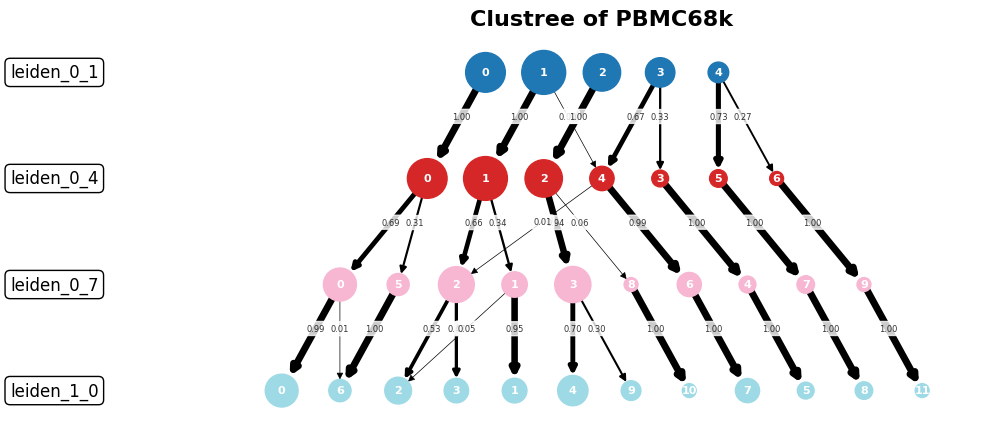

In [3]:
fig = clustree(
    adata,
    [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.1, 0.4, 0.7, 1.0]],
    title="Clustree of PBMC68k",
    edge_weight_threshold=0.00,  # the minimum fraction of the parent cluster assigned to the child cluster to plot
    show_fraction=True,  # show the fraction of cells in each cluster
)
fig.set_size_inches(10, 5)
fig.set_dpi(100)

We can also use `node_color_gene` to color the nodes by the mean gene expression. Here, CD8+ T cells seem to initially be mixed with other cells at low resolutions.

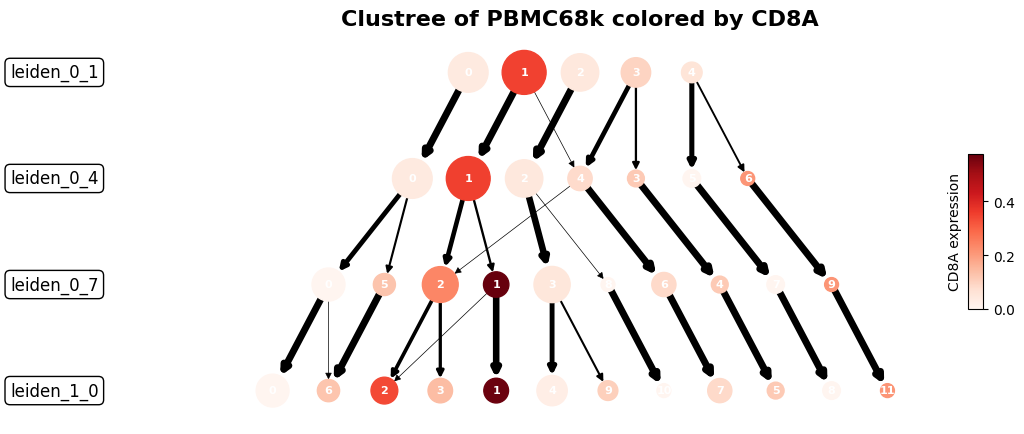

In [4]:
fig = clustree(
    adata,
    [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.1, 0.4, 0.7, 1.0]],
    title="Clustree of PBMC68k colored by CD8A",
    node_color_gene="CD8A",
    node_colormap="Reds",
    show_colorbar=True,
)
fig.set_size_inches(10, 5)
fig.set_dpi(100)

## Plotting on top of a reference

You can also provide a `scatter_reference`, e.g. `X_pca` or `X_umap`, to see where the different cluster centers lie for different resolutions.

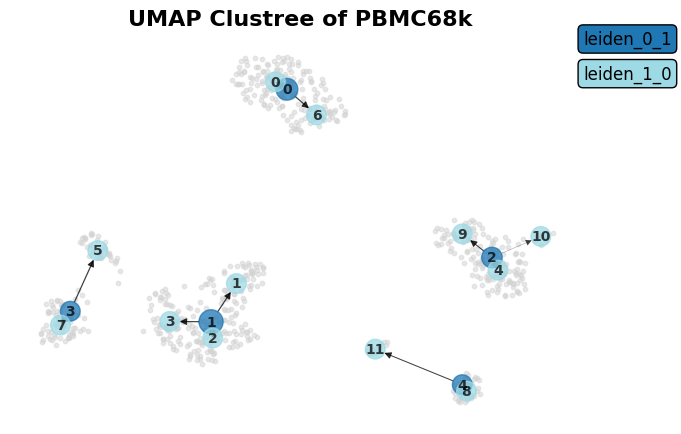

In [5]:
fig = clustree(
    adata,
    [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.1, 1.0]],
    title="UMAP Clustree of PBMC68k",
    scatter_reference="X_umap",
    node_size_range=(200, 300),
    edge_width_range=(0.1, 2.0),
    graph_plot_kwargs={"font_color": "black", "font_size": 10, "alpha": 0.75},
)
fig.set_size_inches(7.5, 5)
fig.set_dpi(100)

## Setting a colormap for each level

This can be useful to match colors in the pyclustree to colors used in UMAPs, plots of spatial transcriptomics data and other visualizations.

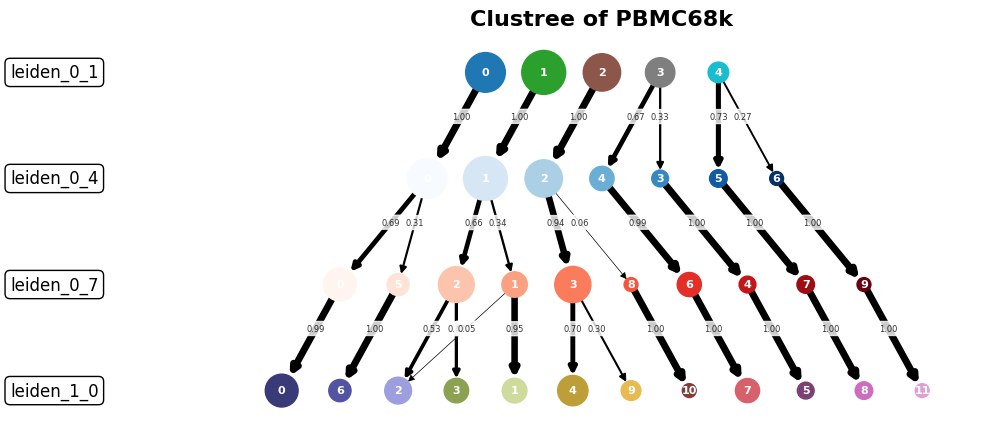

In [6]:
fig = clustree(
    adata,
    [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.1, 0.4, 0.7, 1.0]],
    title="Clustree of PBMC68k",
    node_colormap=[
        "tab10",
        "Blues",
        "Reds",
        "tab20b",
    ],
    edge_weight_threshold=0.05,
    show_fraction=True,
)
fig.set_size_inches(10, 5)
fig.set_dpi(100)